# **Proyek Analisis Data: [Bike Sharing Dataset]**
- **Nama:** [Muhammad Haikal]
- **Email:** [muhammad.haikal494972@gmail.com]
- **ID Dicoding:** [MC283D5Y1226]

**#Alasan Singkat Menggunakan Dataset**

Berdasarkan 3 pilihan dataset yang diberikan (Bike Sharing Dataset, E-Commerce Dataset, dan Air Quality Dataset) saya lebih memilih Bike Sharing Dataset karena dengan dataset tersebut, saya memiliki lebih banyak gambaran tentang analisis apa yang ingin dilakukan dan visualisasi apa yang bisa ditampilkan ketika sepintas membaca judul dari dataset tersebut.

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim?
- Kapan Jam Sibuk Peminjaman Sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [5]:
df_day.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [6]:
df_day.tail(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
df_hour.tail(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [8]:
df_hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


**Insight:**
- Terdapat 2 tabel yang diambil dari dataset berdasarkan data yang disimpan setiap jam dan hari
- Dataset menampung banyaknya penyewaan yang terjadi dari tahun 2011-2012
- Dataset menyimpan informasi hari lengkap dengan tanggal, bulan, dan tahun peminjaman
- Didalam dataset juga tersimpan informasi lainnya seperti cuaca, musim, serta informasi lain yang mungkin akan berguna.

### Assessing Data

In [9]:
# Melihat informasi dari dataset
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# MElihat informasi dari dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#melihat informasi umum dari dataset
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
#melihat informasi umum dari dataset
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
#melihat banyak data dan kolom

print(df_day.shape)

(731, 16)


In [14]:
#memeriksa data yang duplikat pada dataset
df_day.duplicated().sum()

np.int64(0)

In [15]:
#memeriksa data yang kosong
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
#memeriksa banyaknya data dan kolom pada dataset
df_hour.shape

(17379, 17)

In [17]:
#memeriksa data yang duplikat pada dataset
df_hour.duplicated().sum()

np.int64(0)

In [18]:
#memeriksa data yang kosong pada dataset
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
#memeriksa banyaknya nilai yang unik untuk setiap kolom pada dataset
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [20]:
#memeriksa banyaknya nilai yang unik untuk setiap kolom pada dataset
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [21]:
#cek nilai yang unik dari kolom season
df_day['season'].unique()

array([1, 2, 3, 4])

In [22]:
#cek nilai yang unik dari kolom yr
df_day['yr'].unique()

array([0, 1])

In [23]:
#cek nilai yang unik dari kolom mnth
df_day['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
#cek nilai yang unik dari kolom holiday
df_day['holiday'].unique()

array([0, 1])

In [25]:
#cek nilai yang unik dari kolom weekday
df_day['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [26]:
#cek nilai yang unik dari kolom weathersit
df_day['weathersit'].unique()

array([2, 1, 3])

In [27]:
#cek nilai yang unik dari kolom hr
df_hour['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

**Insight:**
**tabel Day (df_day)**

*Berdasarkan file Readme dari dataset tersebut, kolom pada dataset ini terdiri atas :

**instant** : sebagai index


**dteday** : sebagai tanggal peminjaman


season yang mana terdiri dari 4 kategori, yaitu (1:Winter, 2:Spring, 3:Summer, 4:Fall)


**yr** : tahun


**mnth** : bulan


**holiday** : (1:Iya, 2:tidak)


**weekday** : hari apa (0:Minggu...6:Sabtu)


**workday** : hari kerja atau bukamn (1:ya, 2:tidak)


**weathersit** : cuaca (1:Cerah, 2:Berawan, 3:Hujan, MEnding, bersalju, dll (ringan), 4:Badai)


**temp** : temperatur dalam satuan Celcius yang sudah dinomralisasi (dengan pembagi 41)


**atemp** : Suhu yang dirasakan (dalam satuan Celcius) yang sudah dinormalisasi (dengan pembagi 50)

**windspeed** : kecepatan angin yang sudah dinormalisasi (pembagi 67)

**hum** : kelembaban udara (Norm : 100)

**casual** : jumlah pengguna biasa

**registered** : jumlah member

**cnt** : total penyewaan sepeda (casual + registered)

**tabel Hour (df_hour)**

*Berdasarkan file Readme dari dataset tersebut, kolom pada dataset ini hampir sama dengan df_day, hanya saja ada tambahan kolom hour :

**hr** : jam (0-23)

### Cleaning Data

In [28]:
#memeriksa tipe data pada kolom dteday
print("Tipe data 'dteday' : ", type(df_day['dteday'][0]))

Tipe data 'dteday' :  <class 'str'>


In [29]:
#mengubah tipe data string dari dteday ke DateTime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [30]:
#memeriksa tipe data pada kolom dteday
print("Tipe data 'dteday' : ", type(df_day['dteday'][0]))

Tipe data 'dteday' :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [31]:
#mengubah tipe data string dari dteday ke DateTime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [32]:
#memeriksa tipe data pada kolom dteday
print("Tipe data 'dteday' : ", type(df_hour['dteday'][0]))

Tipe data 'dteday' :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [33]:
#memeriksa semua data sekali lagi
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
#memeriksa semua data sekali lagi
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah diperiksa, tidak ada data yang duplikat maupun kosong dari dataset tersebut.
- Tipedata yang ada pada kolom 'dteday' yang semula berupa Object/String diubah menjadi DateTime.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data

In [35]:
#rangkuman parameter statistik dari tebel peminjaman harian
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [36]:
#Pivot tabel jumlah peminajam sepeda berdasarkan musim
df_day.groupby(by='season').cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

Index Season : 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter

In [37]:
#rangkuman parameter statistik dari jumlah tabel peminjaman setiap jam
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [38]:
#Pivot tabel dari jumlah peminjaman sepeda berdasarkan musim setiap jamnya
df_hour.groupby(by='season').agg({
    'cnt':'sum',
    'hr':'sum',
}).sort_values(by='cnt', ascending=False)

,cnt,hr
season,,
3,1061129,51738
2,918589,50757
4,841613,48763
1,471348,49413


Index Season : 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter

In [39]:
#Pivot tabel dari jumlah peminjaman sepeda berdasarkan musim setiap
#dan jumlah jamnya
df_peminjaman_dalam_jam =df_hour.groupby(by='season').agg({
    'season' : "unique",
    'cnt':'sum',
    'hr':'sum',
}).sort_values(by='cnt', ascending=False)

df_peminjaman_dalam_jam['season'] = df_peminjaman_dalam_jam['season'].apply(lambda x: x[0])
df_peminjaman_dalam_jam['season'] = df_peminjaman_dalam_jam['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df_peminjaman_dalam_jam.reset_index(drop=True, inplace=True)
df_peminjaman_dalam_jam

,season,cnt,hr
0,Fall,1061129,51738
1,Summer,918589,50757
2,Winter,841613,48763
3,Spring,471348,49413


In [40]:
#memeriksa apakah data seimbang
df_day.groupby(by='season').instant.count()

season
1    181
2    184
3    188
4    178
Name: instant, dtype: int64

In [41]:
#kenapa spring yang terendah? kita coba periksa working day/cuaca yang terjadi pada saat musim semi (spring)
cek_musim = df_day.groupby(by=['season', 'workingday', 'weathersit']).cnt.sum().sort_values(ascending=False)
cek_musim = cek_musim.reset_index()
cek_musim['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
cek_musim['workingday'].replace({1:'Yes', 0:'No'}, inplace=True)
cek_musim['weathersit'].replace({1:'Cerah', 2:'Berawan', 3:'Hujan', 4:'Badai'}, inplace=True)
cek_musim.sort_values(by=['season', 'cnt'], ascending=False).reset_index()

C:\Users\muham\AppData\Local\Temp\ipykernel_34288\3536177999.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cek_musim['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
C:\Users\muham\AppData\Local\Temp\ipykernel_34288\3536177999.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

,index,season,workingday,weathersit,cnt
0,2,Winter,Yes,Cerah,328472
1,3,Winter,Yes,Berawan,231598
2,8,Winter,No,Cerah,191015
3,14,Winter,No,Berawan,70912
4,16,Winter,Yes,Hujan,18989
5,23,Winter,No,Hujan,627
6,1,Summer,Yes,Cerah,417423
7,6,Summer,Yes,Berawan,211505
8,7,Summer,No,Cerah,209563
9,13,Summer,No,Berawan,76591


**Insight:**
- Musim gugur memiliki jumlah penyewaan tertinggi dibanding musing lainnya, hal ini menunjukkan musim merupakan salah satu faktor yang mempengaruhi keputusan dari pengguna untuk menyewa sepeda.
- Musim semi (spring) memiliki tingkat peminjaman yang terkecil, mungkin hal ini bisa disebabkan oleh cuaca yang masih tidak menentu (mungkin udara yang berangin atau terjadi hujan lebih sering) yang mempengaruhi keputusan pengguna untuk melakukan peminjaman sepeda
- Winter memiliki tingkat peminjaman hampir dua kali lipat dari Spring. Ada kemungkinan Winter di kota ini tidak terlalu ekstrem sehingga orang masih nyaman menggunakan sepeda.



In [42]:
#mengetahui jumlah peminjaman paling ramai di jam berapa
df_hour.groupby(by='hr').cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

In [43]:
#mebuat kategori waktu dengan membagi 24 jam menjadi 4 kategori
#(Pagi untuk jam 5 sampai jam 10, Siang 11 sampai 15, Sore 16 sampai 18,
#dan malam 19 sampai 23 dan dini hari 0 sampai 4 )
df_hour['time_of_day'] = df_hour['hr'].apply(lambda x: 'Pagi' if 5 <= x <= 10 else ('Siang' if 11 <= x <= 15 else ('Sore' if 16 <= x <= 18 else ('Malam' if 19 <= x <= 23 else 'Dini Hari'))))



In [44]:
df_hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Dini Hari
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Dini Hari


In [45]:
#mengetahui jam sibuk dan pada waktu apa
df_hour.groupby(by=['time_of_day', 'hr']).agg({
    'cnt':'sum'
}).sort_values(by=['time_of_day', 'cnt'], ascending=False)

cnt
time_of_day hr        
Sore        17  336860
            18  309772
            16  227748
Siang       13  184919
            12  184414
            15  183149
            14  175652
            11  151320
Pagi        8   261001
            9   159438
            7   154171
            10  126257
            6    55132
            5    14261
Malam       19  226789
            20  164550
            21  125445
            22   95612
            23   63941
Dini Hari   0    39130
            1    24164
            2    16352
            3     8174
            4     4428

(Pagi untuk jam 5 sampai jam 10, Siang dari jam 11 sampai jam 15, Sore dari jam 16 sampai jam 18,
dan malam dari jam 19 sampai jam 23 dan dini haari dari jam 0 sampai jam 4 )

**Insight:**
- Penyewaan sepeda secara signifikan terjadi pada sore hari dibanding waktu lain, yakni berkisar antara jam 16-18, berlanjut hingga malam dan berangsur turun. Hal ini menunjukkan waktu (dalam jam) sangat mempengaruhi keputusan pengguna untuk menyewa sepeda.
- Pagi dan Sore hari merupakan jam yang paling banyak diminati pengguna ketika melakukan peminjaman sepeda. Ini masuk akal karena kondisi matahari yang tidak terlalu terik dan udara yang lebih sejuk dibanding jam lainnnya.
- Waktu Sore memiliki jumlah yang lebih banyak daripada Pagi hari, kemungkinan besar ini erat kaitannya dengan jam pulang sekolah dan jam pulang kantor.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim?

In [46]:
#menampilkan kembali data peminjaman berdasarkan musim sepanjang tahun 2011-2012
tren_by_season = df_day.groupby(by='season')['cnt'].sum().reset_index()
tren_by_season['season'] = tren_by_season['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
tren_by_season

,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


In [47]:
#Ubah nilai pada kolom "season" menjadi berdasarkan kateogori (1 : Springer, 2 : Summer, 3 : Fall, 4 : Winter )
df_day['season'] = df_day['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [48]:
#Ubah nilai pada kolom "weathersit" menjadi berdasarkan kateogori (1 : Cerah, 2 : Berawan, 3 : Hujan, 4 : Badai )
df_day['weathersit'] = df_day['weathersit'].replace({1:'Cerah', 2:'Berawan', 3:'Hujan', 4:'Badai'})

In [49]:
#jumlah peminjaman berdasarkan musim dalam rentang 2011-2012
tren_by_season_total = df_day.groupby(by='season')['cnt'].sum().reset_index()
tren_by_season_total

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


C:\Users\muham\AppData\Local\Temp\ipykernel_34288\1476373150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tren_by_season_total, x="season", y="cnt", palette="Set2")


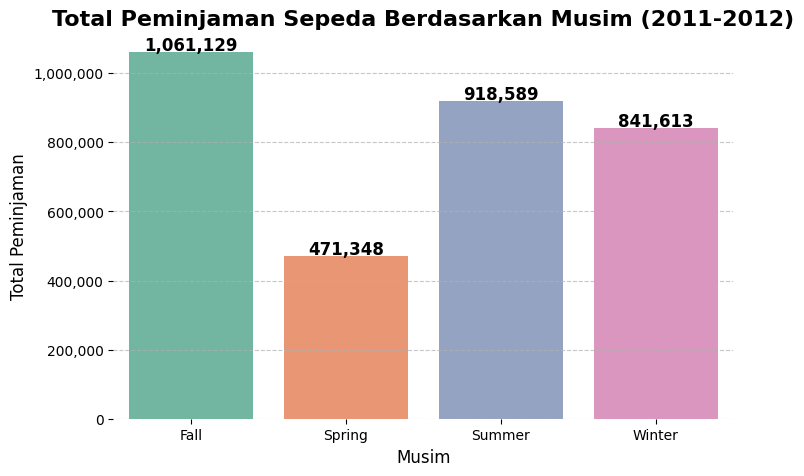

In [50]:
#Vsualisasi data
plt.figure(figsize=(8, 5))
sns.barplot(data=tren_by_season_total, x="season", y="cnt", palette="Set2")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim (2011-2012)", fontsize=16, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}")) #supaya label y tidak menampilkan data yang sudah di normalisasi
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
# Menampilkan nilai di atas batang
for i, value in enumerate(tren_by_season_total['cnt']):
    plt.text(i, value + 5000, f"{value:,}", ha="center", fontsize=12, fontweight="bold")

plt.show()


In [51]:
#jumlah peminjaman berdasarkan musim di tahun 2011
tren_by_season_2011 = df_day[df_day['yr'] == 0].groupby(by='season')['cnt'].sum().reset_index()
tren_by_season_2011

,season,cnt
0,Fall,419650
1,Spring,150000
2,Summer,347316
3,Winter,326137


C:\Users\muham\AppData\Local\Temp\ipykernel_34288\410122903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=musim, y=tren_by_season_2011['cnt'], palette="Set2")


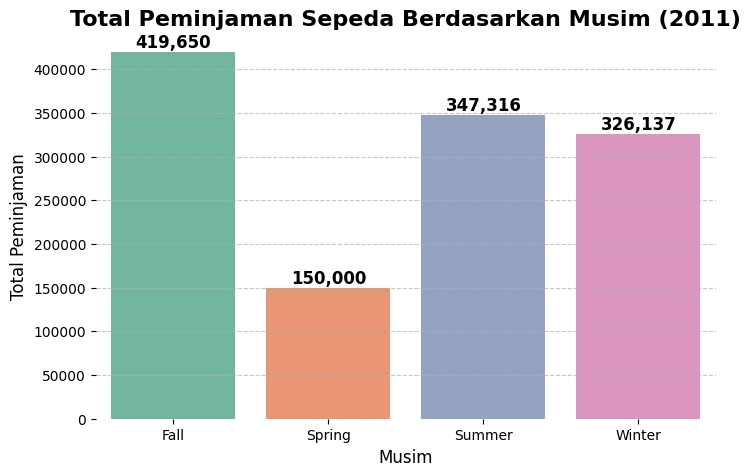

In [52]:
#Vsualisasi data
musim = tren_by_season_2011['season']
plt.figure(figsize=(8, 5))
sns.barplot(x=musim, y=tren_by_season_2011['cnt'], palette="Set2")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim (2011)", fontsize=16, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
# Menampilkan nilai di atas batang
for i, value in enumerate(tren_by_season_2011['cnt']):
    plt.text(i, value + 5000, f"{value:,}", ha="center", fontsize=12, fontweight="bold")

plt.show()


In [53]:
#jumlah peminjaman berdasarkan musim di tahun 2012
tren_by_season_2012 = df_day[df_day['yr'] == 1].groupby(by='season')['cnt'].sum().reset_index()
tren_by_season_2012

,season,cnt
0,Fall,641479
1,Spring,321348
2,Summer,571273
3,Winter,515476


C:\Users\muham\AppData\Local\Temp\ipykernel_34288\2424561038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=musim, y=tren_by_season_2012['cnt'], palette="Set2")


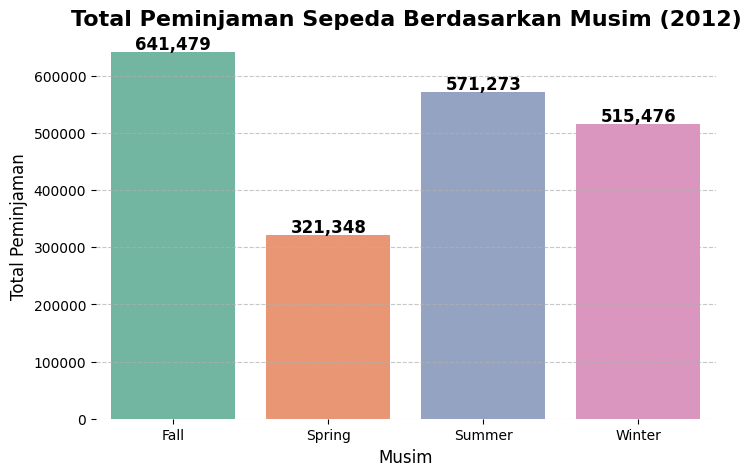

In [54]:
#Visualisasi data
musim = tren_by_season_2012['season']
plt.figure(figsize=(8, 5))
sns.barplot(x=musim, y=tren_by_season_2012['cnt'], palette="Set2")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim (2012)", fontsize=16, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
# Menampilkan nilai di atas batang
for i, value in enumerate(tren_by_season_2012['cnt']):
    plt.text(i, value + 5000, f"{value:,}", ha="center", fontsize=12, fontweight="bold")

plt.show()


**Insight:**
- Di sepanjang tahun 2011 - 2012, jumlah penyewaan sepeda lebih tinggi pada saat musim gugur (Fall) dibandingkan dengan musim-musim lain.
- Terjadi peningkatan jumlah peminjaman sepada yang cukup signifikan pada setiap musim apabila dibandingkan dari tahun 2011 dengan 2012.
- Dengan melihat tren peminjaman sepeda sepanjang tahun 2011 dan 2012, dapat disimpulkan bahwasannya musim dapat berpengaruh secara signifikan terhadap jumlah peminjaman sepeda

### Pertanyaan 2: Kapan Jam Sibuk Peminjaman Sepeda?

In [55]:
#jumlah total peminjaman sepeda pada tiap jam pada rentang tahun 2011-2012
peminjaman_tiap_jam_2011_2012 = df_hour.groupby(by=['hr', 'time_of_day']).cnt.sum().reset_index()
peminjaman_tiap_jam_2011_2012

,hr,time_of_day,cnt
0,0,Dini Hari,39130
1,1,Dini Hari,24164
2,2,Dini Hari,16352
3,3,Dini Hari,8174
4,4,Dini Hari,4428
5,5,Pagi,14261
6,6,Pagi,55132
7,7,Pagi,154171
8,8,Pagi,261001
9,9,Pagi,159438


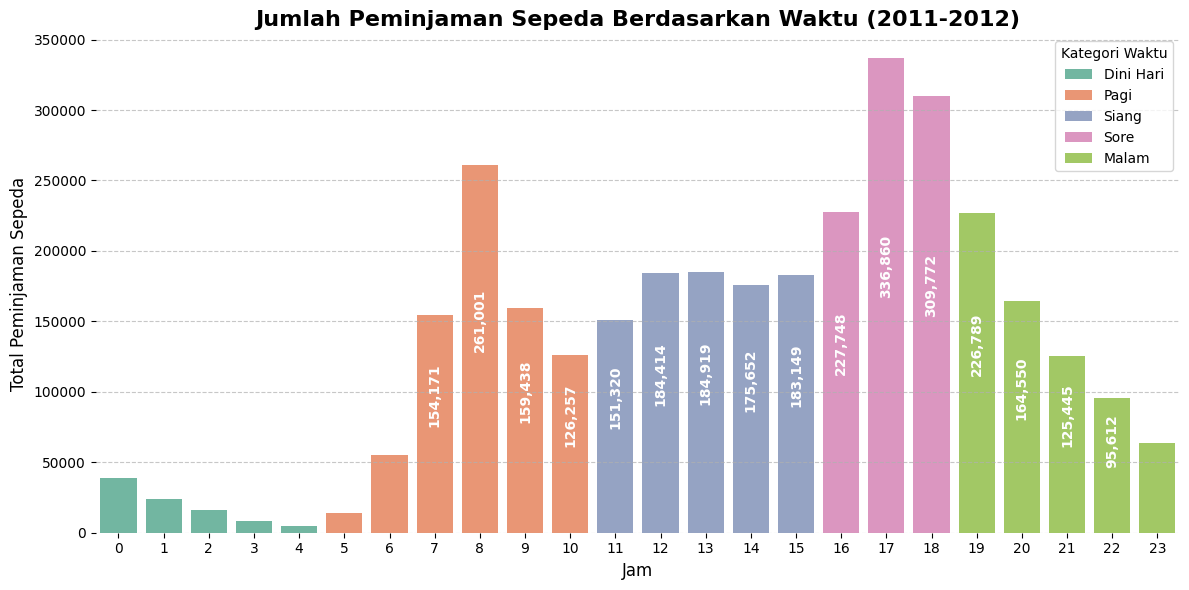

In [56]:
#Visualisasi Data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='hr', y='cnt', hue='time_of_day', data=peminjaman_tiap_jam_2011_2012, palette='Set2', errorbar=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Waktu (2011-2012)", fontsize=16, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Peminjaman Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.legend(title="Kategori Waktu")

for index, value in enumerate(peminjaman_tiap_jam_2011_2012["cnt"]):
    if value > 75000 :
      plt.text(index, value * 0.5, f"{value:,}", ha="center", fontsize=10, fontweight="bold", color="white",rotation=90)

plt.tight_layout()
plt.show()


In [57]:
#jumlah total peminjaman pada tiap jam per tahun 2011
peminjaman_tiap_jam_2011 = df_hour[df_hour['yr'] == 0].groupby(by=['hr', 'time_of_day'])['cnt'].sum().reset_index()
peminjaman_tiap_jam_2011

,hr,time_of_day,cnt
0,0,Dini Hari,15540
1,1,Dini Hari,9558
2,2,Dini Hari,6661
3,3,Dini Hari,3441
4,4,Dini Hari,1817
5,5,Pagi,5157
6,6,Pagi,20801
7,7,Pagi,56930
8,8,Pagi,95467
9,9,Pagi,59486


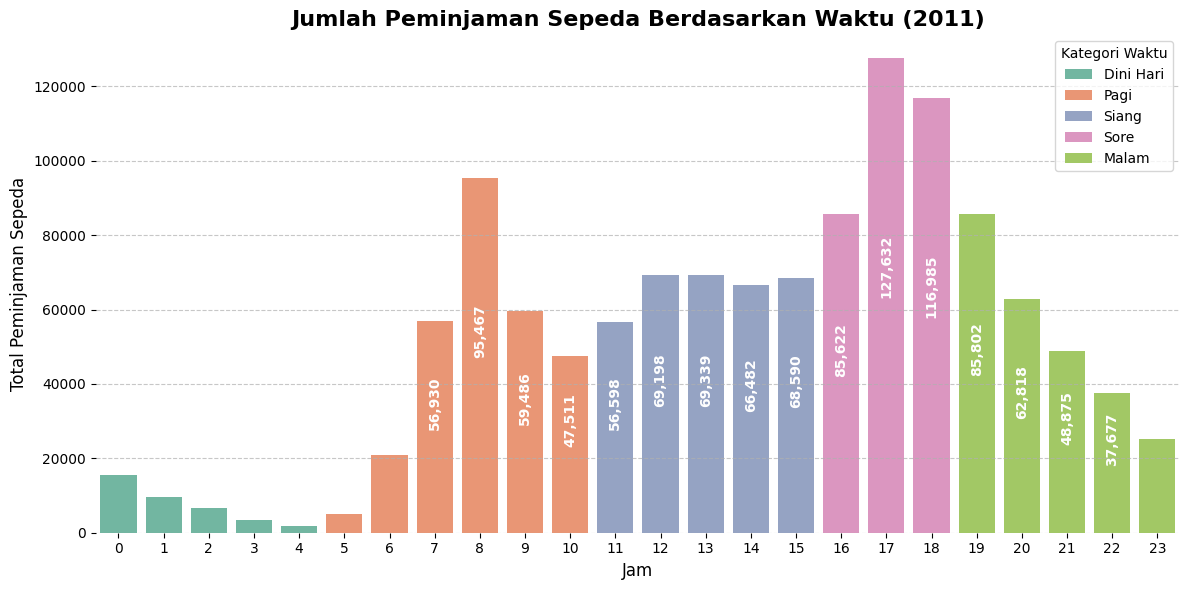

In [58]:
#Visualisasi Data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='hr', y='cnt', hue='time_of_day', data=peminjaman_tiap_jam_2011, palette='Set2', errorbar=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Waktu (2011)", fontsize=16, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Peminjaman Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.legend(title="Kategori Waktu")

for index, value in enumerate(peminjaman_tiap_jam_2011["cnt"]):
    if value > 30000 :
      plt.text(index, value * 0.5, f"{value:,}", ha="center", fontsize=10, fontweight="bold", color="white",rotation=90)

plt.tight_layout()
plt.show()


In [59]:
#jumlah total peminjaman pada tiap jam per tahun 2012
peminjaman_tiap_jam_2012 = df_hour[df_hour['yr'] == 1].groupby(by=['hr', 'time_of_day']).cnt.sum().reset_index()
peminjaman_tiap_jam_2012

,hr,time_of_day,cnt
0,0,Dini Hari,23590
1,1,Dini Hari,14606
2,2,Dini Hari,9691
3,3,Dini Hari,4733
4,4,Dini Hari,2611
5,5,Pagi,9104
6,6,Pagi,34331
7,7,Pagi,97241
8,8,Pagi,165534
9,9,Pagi,99952


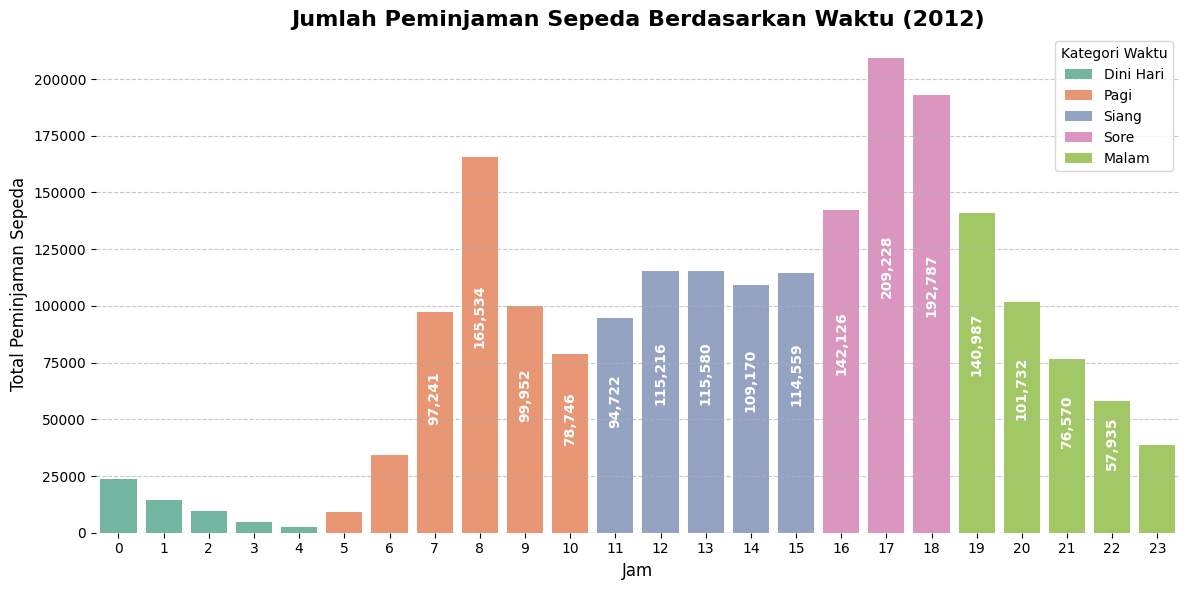

In [60]:
#Visualisasi Data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='hr', y='cnt', hue='time_of_day', data=peminjaman_tiap_jam_2012, palette='Set2', errorbar=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Waktu (2012)", fontsize=16, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Peminjaman Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.legend(title="Kategori Waktu")

for index, value in enumerate(peminjaman_tiap_jam_2012["cnt"]):
    if value > 50000 :
      plt.text(index, value * 0.5, f"{value:,}", ha="center", fontsize=10, fontweight="bold", color="white",rotation=90)

plt.tight_layout()
plt.show()


**Insight:**
- Penyewaan sepeda mencapai puncaknya pada dua periode utama, yaitu pagi hari (07:00 - 09:00) dan sore hari (16:00 - 18:00), dengan jumlah tertinggi terjadi pada pukul 17:00.
- Aktivitas penyewaan paling rendah terjadi pada dini hari (00:00 - 05:00), menunjukkan bahwa sangat sedikit pengguna yang meminjam sepeda pada waktu tersebut.
- Dibandingkan dengan tahun 2011, jumlah penyewaan sepeda di tahun 2012 mengalami peningkatan di hampir setiap jam.
- Dengan berdasarkan pada pola penyewaan sepeda setiap jam ini, dapat diambil kesimpulan bahwasannya waktu (jam) sangat berpengaruh terhadap jumlah penyewaan sepeda.

## Conclusion

- **Conclution pertanyaan 1**

Musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda, yang mana jumlah penyewaan terbesar terjadi ketika memasuki musim gugur (Fall) apabila dibandingkan dengan jumlah penyewaan pada musim-musim lain. Apabila diperhatikan, terjadi peningkatan jumlah penyewaan sepeda yang cukup tinggi pada setiap musim apabila kita bandingkan dari tahun 2011 dengan 2012. Secara garis besar juga, dapat kita ketahui jumlah penyewaan yang paling sedikit justru berada pada saat musim semi (spring) yang mana cukup mengejutkan, mengingat pada musim dingin (winter), jumlah penyewaan justru naik hampir dua kali lipat apabila dibandingkan dengan pada saat musim semi. Dengan mengetahui pola penyewaan berdasarkan musim ini, dapat disimpulkan bahwasannya jumlah penyewaan sangat dipengaruhi oleh musim yang sedang terjadi.

- **Conclution pertanyaan 2**

Berdasarkan visualisasi data penyewaan sepeda dalam rentang tahun 2011-2012, dapat diperoleh informasi mengenai pola penyewaan sepeda yang dilakukan oleh pengguna setiap jamnya. Pola penyewaan sepeda tersebut menunjukkan bahwasannya sore hari adalah waktu dengan jumlah penyewaan tertinggi, baik itu pada tahun 2011 maupun di tahun 2012 yang mana mengindikasikan kegiatan bersepeda pada sore hari sudah menjadi rutinitas mereka sehari-hari. Jumlah penyewaan sepeda terbesar kedua berdasarkan kategori waktu adalah pada pagi hari, lebih tepatnya pada pukul 8, yang mana sama-sama memiliki nilai yang tinggi di kedua tahun (2011 & 2012). Sedangkan pada malam hari, jumlah penyewaan cenderung menurun, apalagi pada saat dini hari. Disamping itu juga, terdapat peningkatan pada jumlah penyewaan sepeda dari tahun ke tahun, hal ini mengindikasikan adanya pertumbuhan minat/kebutuhan terhadap penggunaan sepeda ini sebagai pilihan moda transportasi.
